In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
from IPython.core.display import HTML
HTML("<style>.jp-RenderedMarkdown{font-family:'IRANSans,Tahoma,Helvetica,sans-serif';display:flex;flex-direction:column;margin-top:10px;font-size:1rem;direction:rtl}mark{color:inherit;padding:2px; background-color:#88888888}</style>")

In [4]:
df = pd.read_csv('LaLiga_dataset.csv')
df

,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
0,1970-71,Real Zaragoza,3,0,5,13,3,18,9,30,18,14,8,22,54,-32
1,1970-71,Elche,4,0,5,11,4,16,10,30,22,17,8,25,46,-21
2,1970-71,Las Palmas,5,0,3,12,5,15,10,30,25,25,8,33,42,-9
3,1970-71,Sabadell,8,0,3,14,8,17,5,30,29,19,9,28,49,-21
4,1970-71,Espanyol,7,1,4,9,8,13,9,30,33,13,5,18,25,-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,2016-17,Villarreal,11,8,4,5,19,9,10,38,67,35,21,56,33,23
904,2016-17,Sevilla,14,7,1,7,21,8,9,38,72,39,30,69,49,20
905,2016-17,Atletico de Madrid,14,9,3,3,23,6,9,38,78,40,30,70,27,43
906,2016-17,Barcelona,15,13,1,3,28,4,6,38,90,64,52,116,37,79


In [5]:
df.head(5)

,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
0,1970-71,Real Zaragoza,3,0,5,13,3,18,9,30,18,14,8,22,54,-32
1,1970-71,Elche,4,0,5,11,4,16,10,30,22,17,8,25,46,-21
2,1970-71,Las Palmas,5,0,3,12,5,15,10,30,25,25,8,33,42,-9
3,1970-71,Sabadell,8,0,3,14,8,17,5,30,29,19,9,28,49,-21
4,1970-71,Espanyol,7,1,4,9,8,13,9,30,33,13,5,18,25,-7


In [6]:
df.tail(7)

,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
901,2016-17,Athletic Club,13,6,2,11,19,13,6,38,63,36,17,53,43,10
902,2016-17,Real Sociedad,10,9,4,8,19,12,7,38,64,30,29,59,53,6
903,2016-17,Villarreal,11,8,4,5,19,9,10,38,67,35,21,56,33,23
904,2016-17,Sevilla,14,7,1,7,21,8,9,38,72,39,30,69,49,20
905,2016-17,Atletico de Madrid,14,9,3,3,23,6,9,38,78,40,30,70,27,43
906,2016-17,Barcelona,15,13,1,3,28,4,6,38,90,64,52,116,37,79
907,2016-17,Real Madrid,14,15,1,2,29,3,6,38,93,48,58,106,41,65


In [7]:
print(df.dtypes)

season             object
club               object
home_win            int64
away_win            int64
home_loss           int64
away_loss           int64
matches_won         int64
matches_lost        int64
matches_drawn       int64
total_matches       int64
points              int64
home_goals          int64
away_goals          int64
goals_scored        int64
goals_conceded      int64
goal_difference     int64
dtype: object


In [8]:
print(df.describe())

         home_win    away_win   home_loss   away_loss  matches_won  \
count  908.000000  908.000000  908.000000  908.000000   908.000000   
mean     9.582599    4.118943    4.118943    9.582599    13.701542   
std      3.107555    2.776725    2.531206    3.092974     4.966050   
min      1.000000    0.000000    0.000000    1.000000     2.000000   
25%      7.000000    2.000000    2.000000    8.000000    10.000000   
50%      9.000000    4.000000    4.000000   10.000000    13.000000   
75%     12.000000    6.000000    6.000000   12.000000    16.000000   
max     19.000000   16.000000   15.000000   18.000000    32.000000   

       matches_lost  matches_drawn  total_matches      points  home_goals  \
count    908.000000     908.000000     908.000000  908.000000  908.000000   
mean      13.701542       9.577093      36.980176   50.681718   29.508811   
std        4.589442       2.986852       2.522150   14.104626    9.757192   
min        1.000000       1.000000      30.000000   13.000000

In [9]:
def find_consistent_team_seasons(laliga_data):
    
    team_count_per_season = laliga_data.groupby('season')['club'].nunique()
    
    consistent_seasons = team_count_per_season[team_count_per_season == team_count_per_season.shift(1)]
    
    return consistent_seasons

consistent_seasons = find_consistent_team_seasons(df)
print(consistent_seasons)


season
1972-73    18
1973-74    18
1974-75    18
1975-76    18
1976-77    18
1977-78    18
1978-79    18
1979-80    18
1980-81    18
1981-82    18
1982-83    18
1983-84    18
1984-85    18
1985-86    18
1986-87    18
1988-89    20
1989-90    20
1990-91    20
1991-92    20
1992-93    20
1993-94    20
1994-95    20
1996-97    22
1998-99    20
1999-00    20
2000-01    20
2001-02    20
2002-03    20
2003-04    20
2004-05    20
2005-06    20
2006-07    20
2007-08    20
2008-09    20
2009-10    20
2010-11    20
2011-12    20
2012-13    20
2013-14    20
2014-15    20
2015-16    20
2016-17    20
Name: club, dtype: int64


In [10]:
season_points = df.groupby('season')['points'].sum()
points_array = np.array(season_points)

print(points_array)

[ 659  836  828  847  835  847  843  848  843  831  848  862  839  837
  809  840 1087 1038 1028 1033 1024 1045 1030 1034 1027 1256 1267 1030
 1043 1028 1041 1039 1035 1045 1040 1035 1042 1053 1057 1045 1061 1046
 1056 1054 1049 1048 1051]


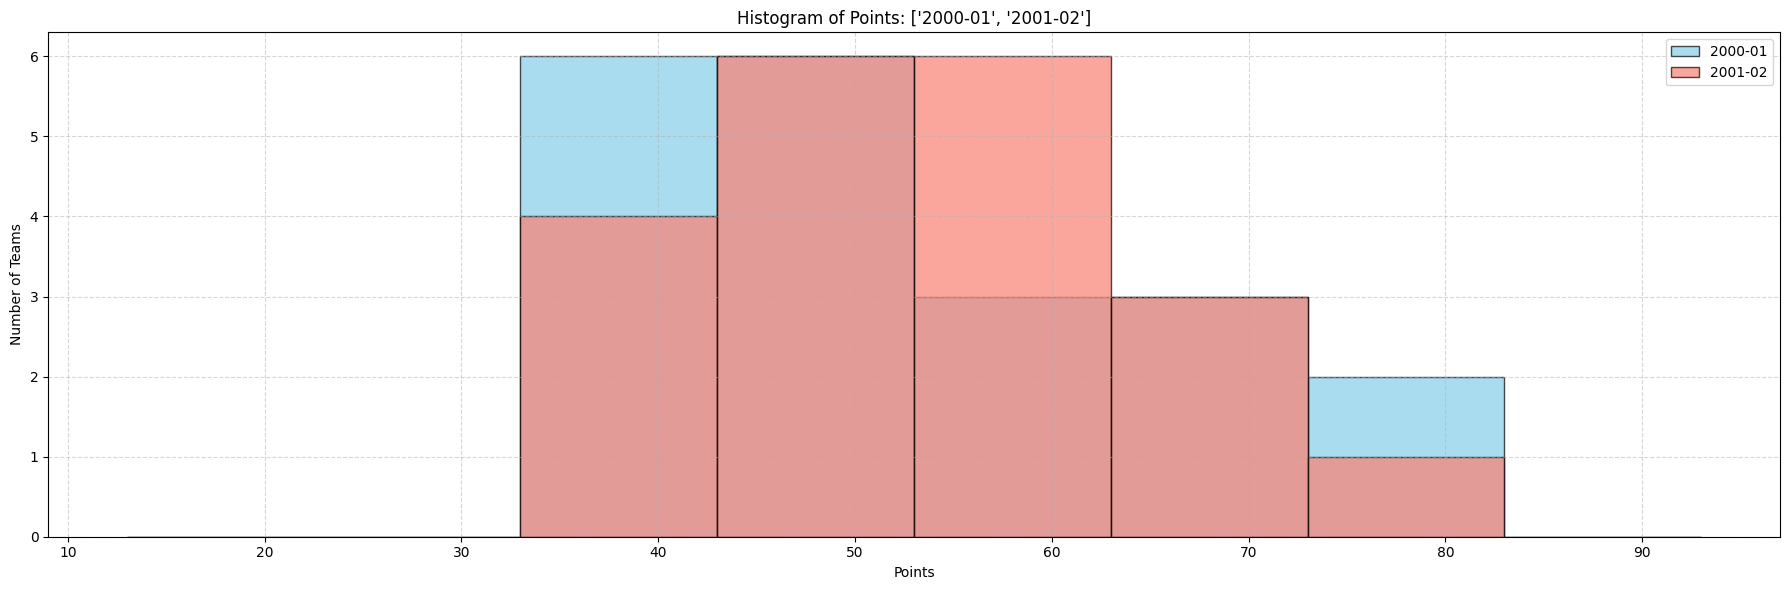

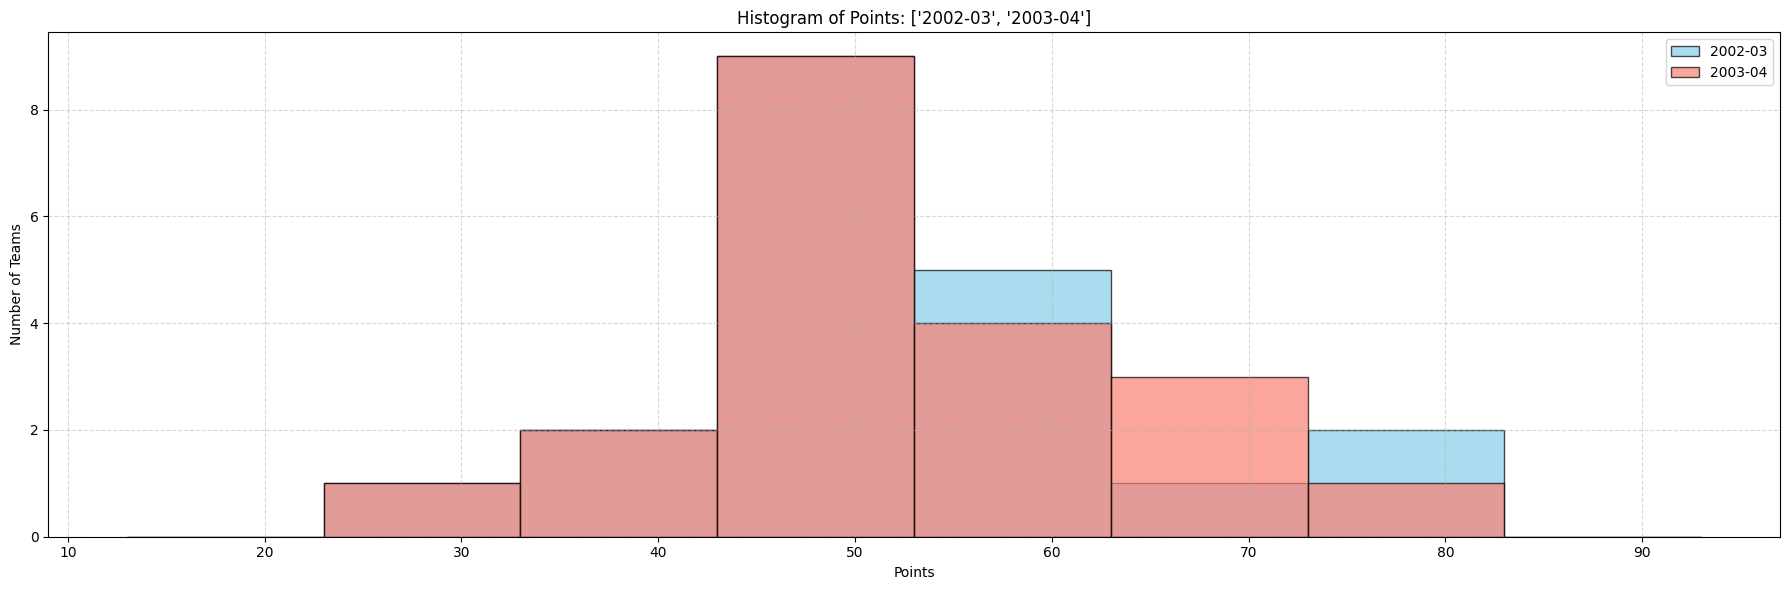

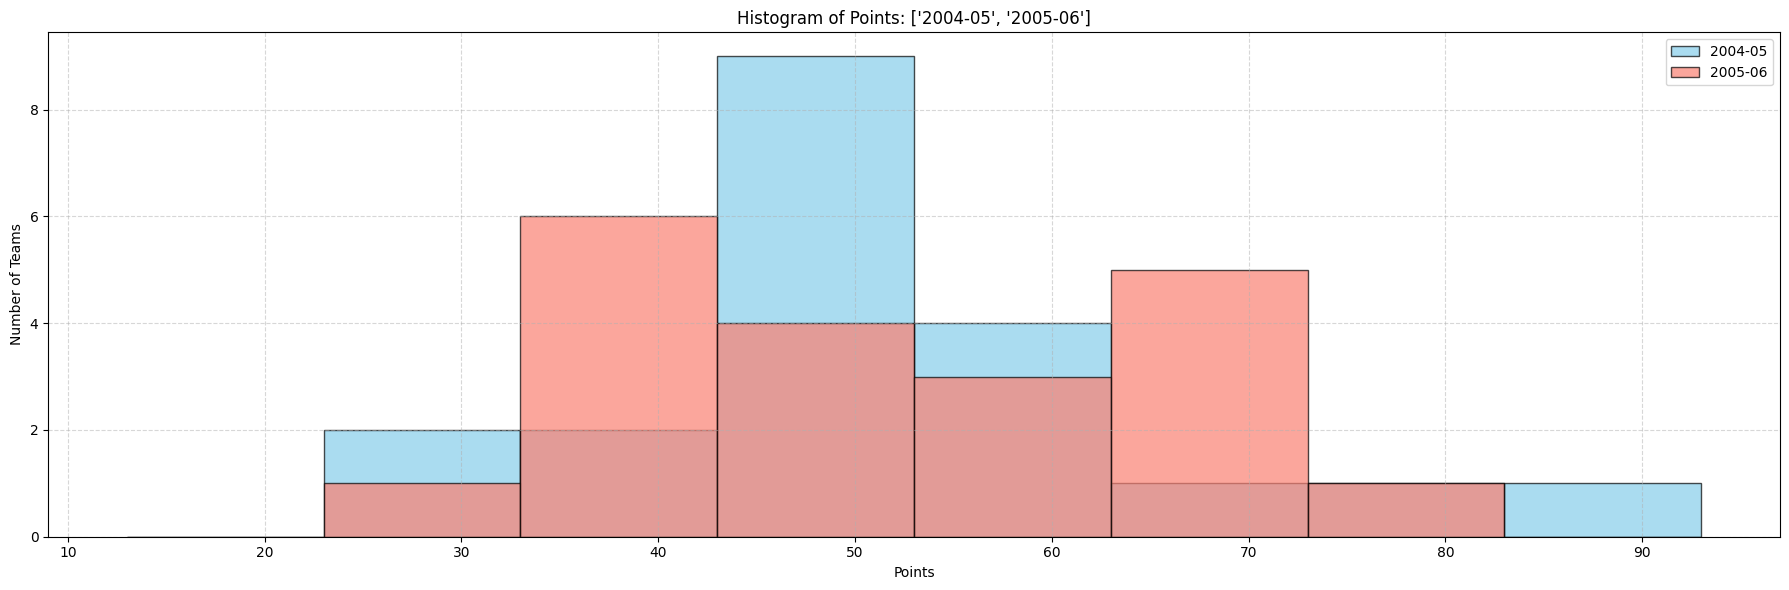

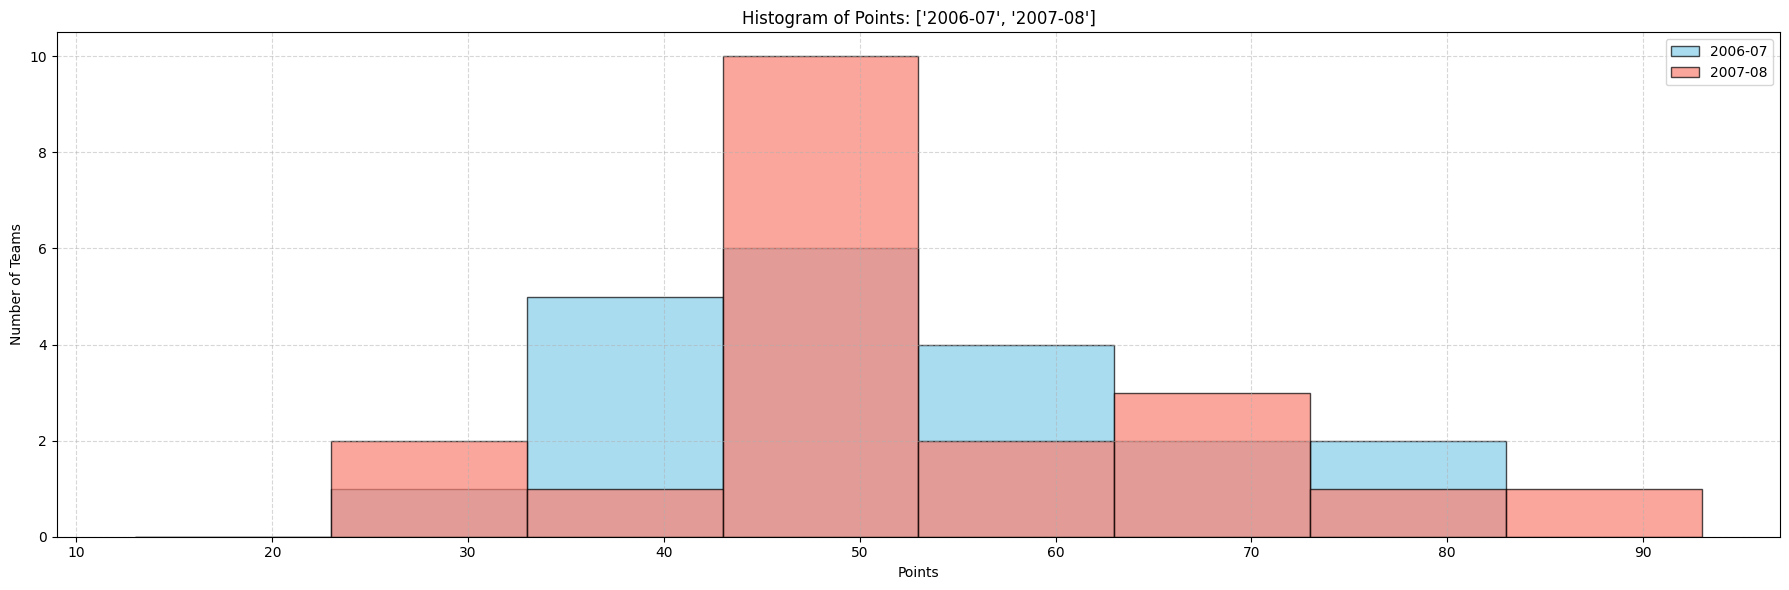

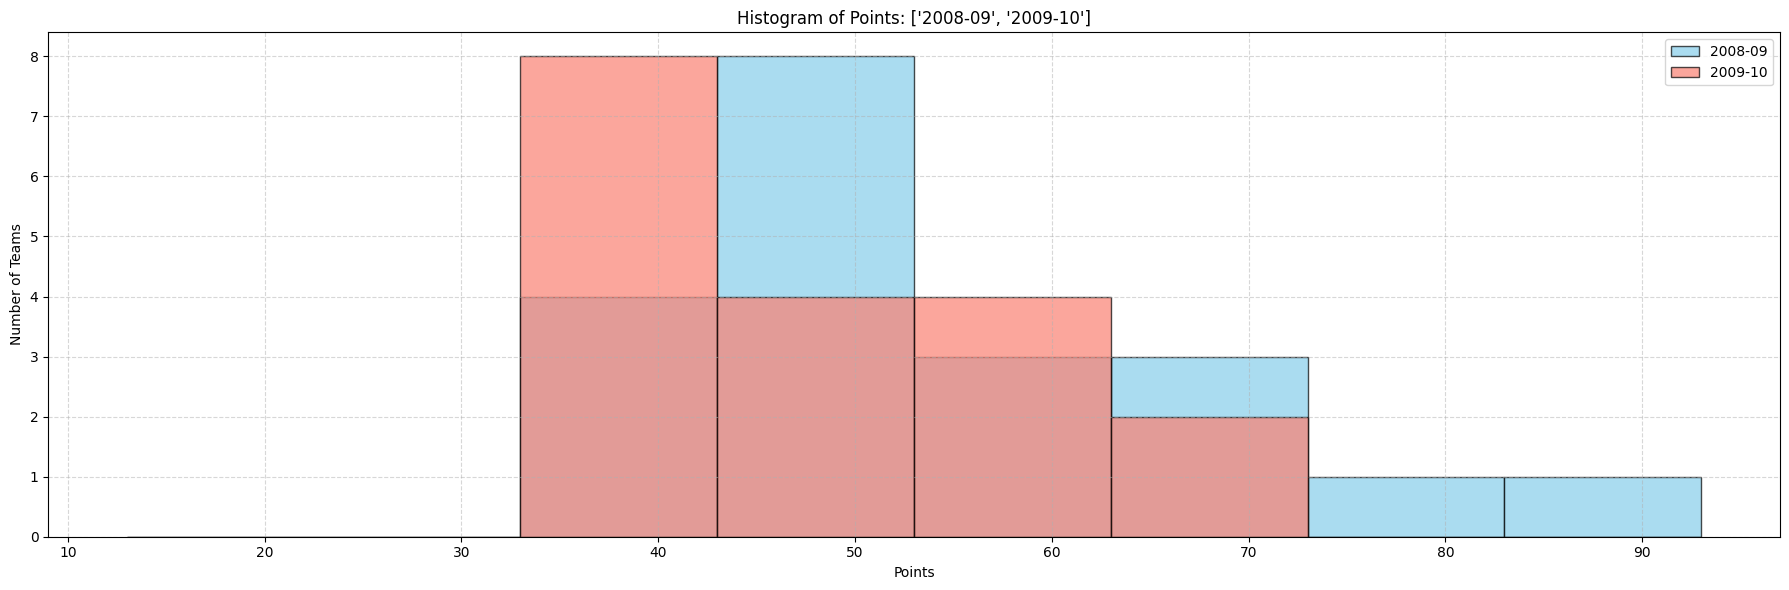

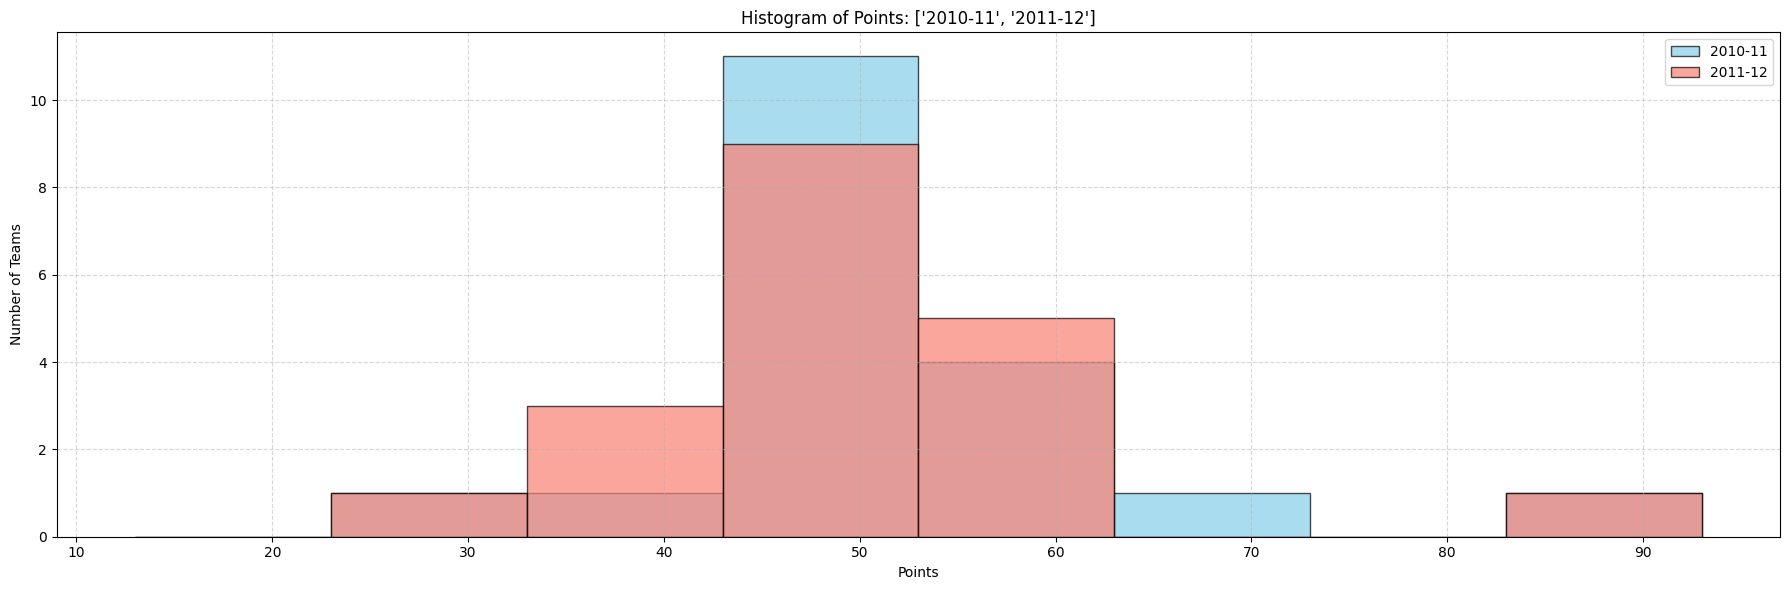

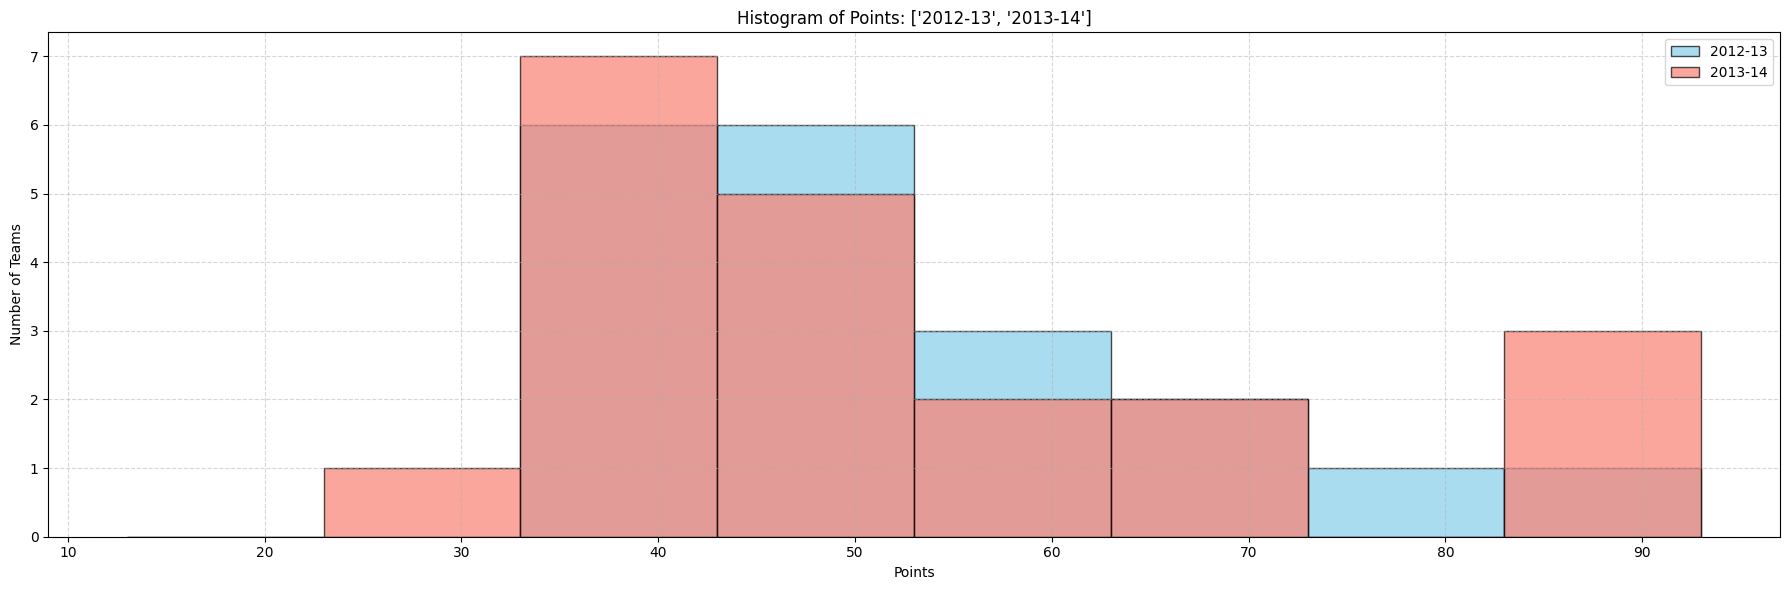

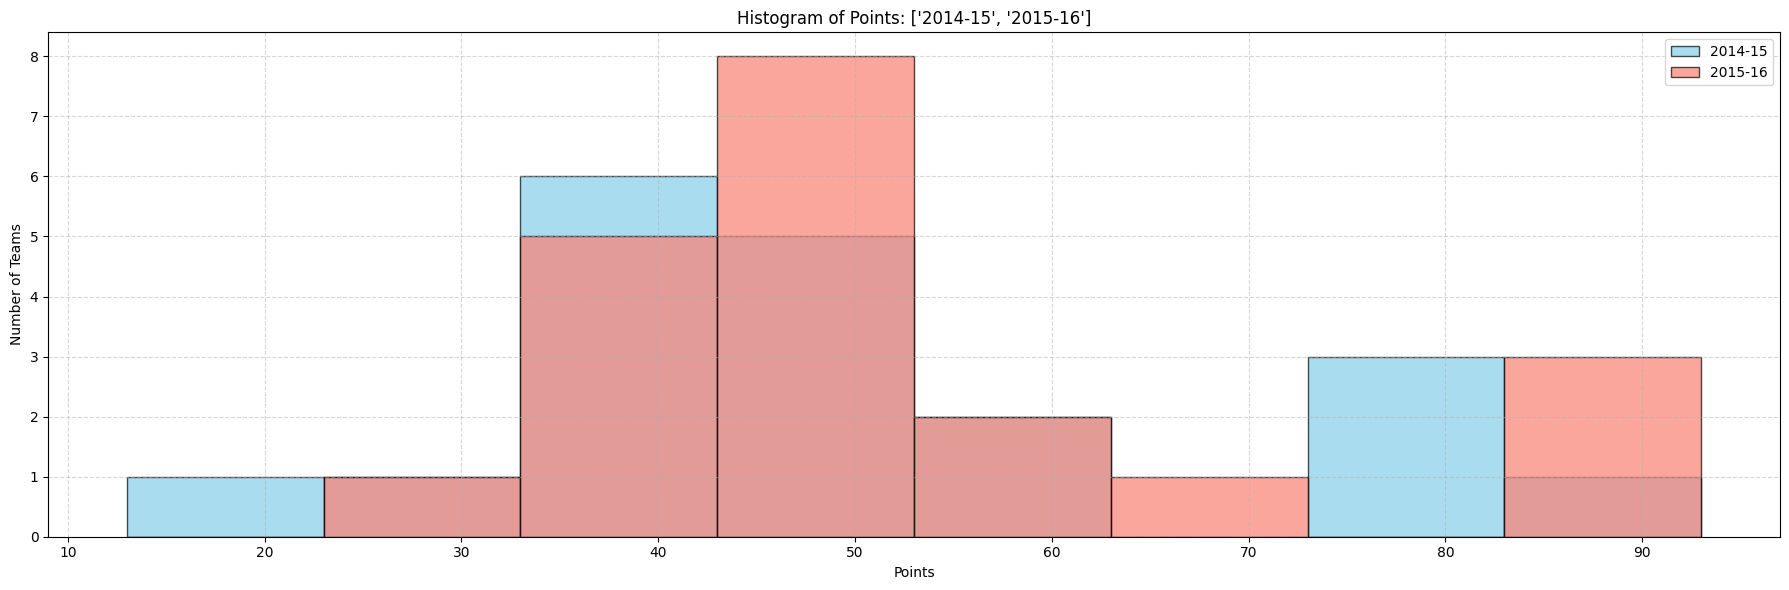

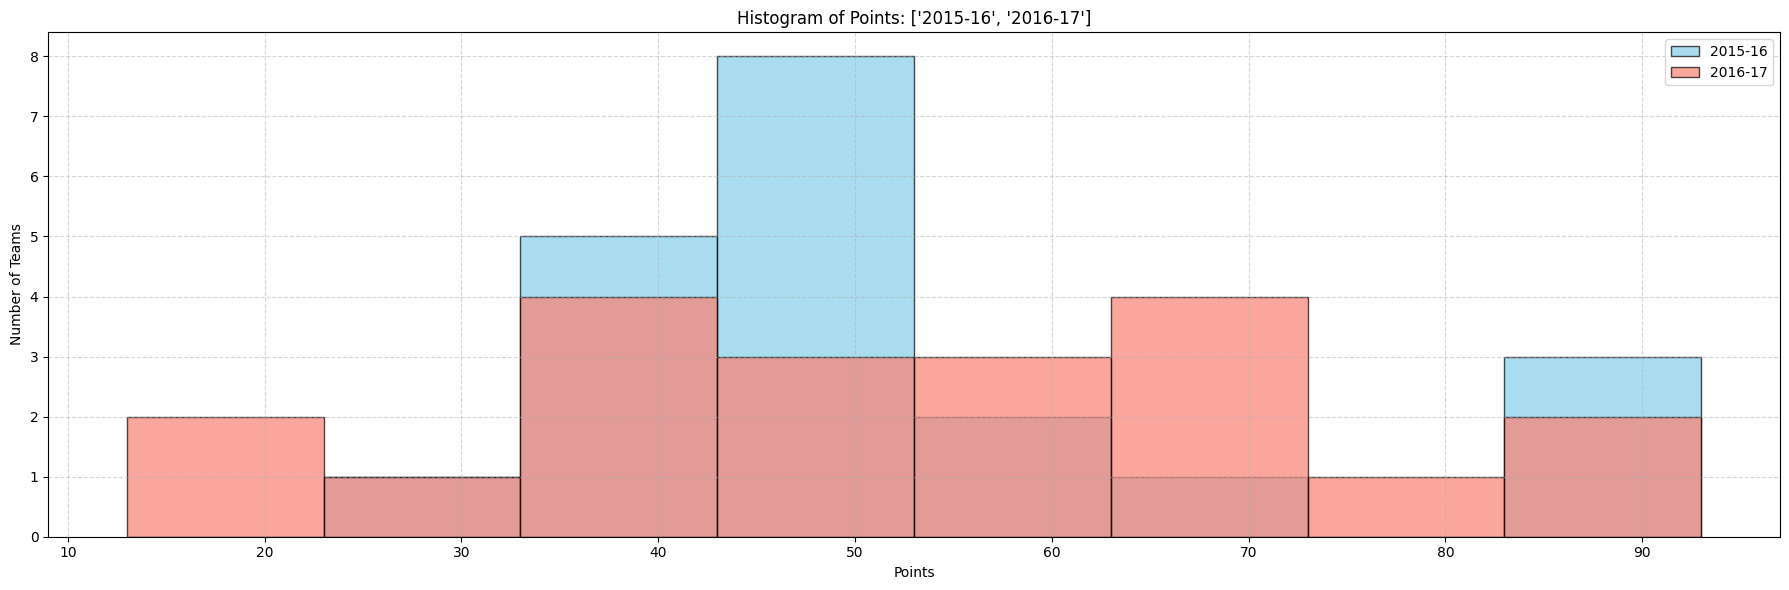

In [11]:
def plot_histograms_for_selected_seasons(laliga_data, seasons):
    
    plt.figure(figsize=(18, 6))
    
    min_points = laliga_data['points'].min()
    max_points = laliga_data['points'].max()
    bins = np.arange(min_points, max_points , 10) 
    
    
        
    season_data_1 = laliga_data[laliga_data['season'] == seasons[0]]['points']
    season_data_2 = laliga_data[laliga_data['season'] == seasons[1]]['points']
    # plt.subplot(1, 2, i + 1)
    plt.hist(season_data_1, bins=bins, alpha=0.7, label=f'{seasons[0]}', edgecolor='black', color=['skyblue'])
    plt.hist(season_data_2, bins=bins, alpha=0.7, label=f'{seasons[1]}', edgecolor='black', color=['salmon'])
    plt.xlabel('Points')
    plt.ylabel('Number of Teams')
    plt.title(f'Histogram of Points: {seasons}')
    #plt.xticks(bins)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
    
seasons = ['2000-01', '2001-02']
plot_histograms_for_selected_seasons(df, seasons)   
seasons = ['2002-03', '2003-04']
plot_histograms_for_selected_seasons(df, seasons) 
seasons = ['2004-05', '2005-06']
plot_histograms_for_selected_seasons(df, seasons) 
seasons = ['2006-07', '2007-08']
plot_histograms_for_selected_seasons(df, seasons) 
seasons = ['2008-09', '2009-10']
plot_histograms_for_selected_seasons(df, seasons) 
seasons = ['2010-11', '2011-12']
plot_histograms_for_selected_seasons(df, seasons) 
seasons = ['2012-13', '2013-14']
plot_histograms_for_selected_seasons(df, seasons) 
seasons = ['2014-15', '2015-16']
plot_histograms_for_selected_seasons(df, seasons)
seasons = ['2015-16', '2016-17']
plot_histograms_for_selected_seasons(df, seasons) 

In [13]:
def calculate_statistics(laliga_data, start_year, end_year):
    seasons = [f'{year}-{str(year+1)[-2:]}' for year in range(start_year, end_year+1)]
    statistics = []
    
    for season in seasons:
        season_data = laliga_data[laliga_data['season'] == season]['points']
        mean = season_data.mean()
        median = season_data.median()
        std_dev = season_data.std()
        statistics.append((season, mean, median, std_dev))
    stats_df = pd.DataFrame(statistics, columns=['Season', 'Mean', 'Median', 'Standard Deviation'])
    print(stats_df)
    return stats_df
stats_df = calculate_statistics(df, 2000, 2016)

     Season   Mean  Median  Standard Deviation
0   2000-01  52.05    47.5           12.500421
1   2001-02  51.95    51.0           10.630022
2   2002-03  51.75    48.5           12.752193
3   2003-04  52.25    51.0           12.502105
4   2004-05  52.00    50.5           14.360032
5   2005-06  51.75    49.0           14.671401
6   2006-07  52.10    49.5           13.466919
7   2007-08  52.65    50.5           14.246976
8   2008-09  52.85    46.5           14.517775
9   2009-10  52.25    45.5           18.597892
10  2010-11  53.05    46.5           16.769254
11  2011-12  52.30    48.0           16.742948
12  2012-13  52.80    46.5           17.748536
13  2013-14  52.70    46.5           18.287471
14  2014-15  52.45    49.0           20.813647
15  2015-16  52.40    44.5           18.103213
16  2016-17  52.55    50.0           20.625674


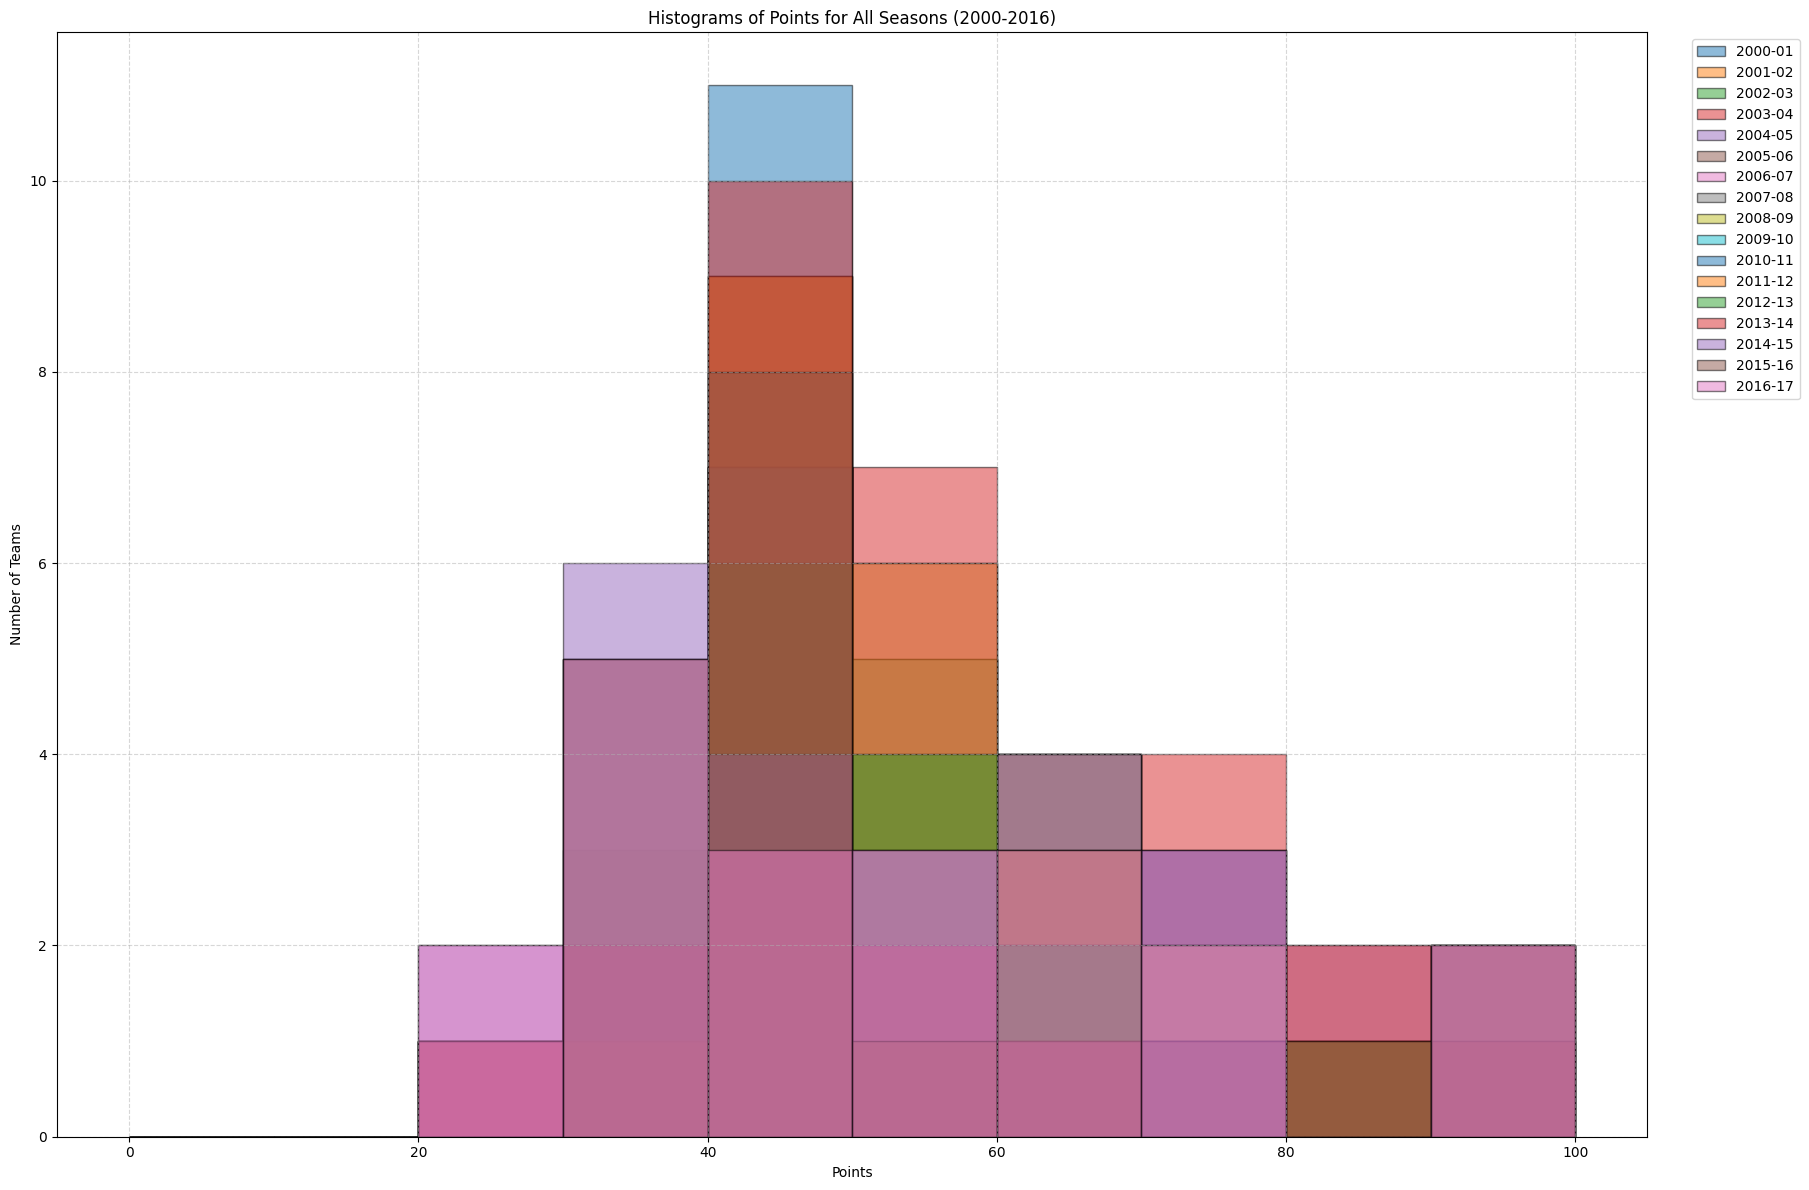

In [14]:
def plot_histograms_for_all_seasons(laliga_data, start_year, end_year):
    
    plt.figure(figsize=(18, 12))
    
    min_points = 0
    max_points = laliga_data['points'].max()
    bins = np.arange(min_points, max_points + 10, 10) 

    seasons = [f'{year}-{str(year+1)[-2:]}' for year in range(start_year, end_year+1)]
    
    for season in seasons:
        season_data = laliga_data[laliga_data['season'] == season]['points']
        plt.hist(season_data, bins=bins, alpha=0.5, label=f'{season}', edgecolor='black')

    plt.xlabel('Points')
    plt.ylabel('Number of Teams')
    plt.title('Histograms of Points for All Seasons (2000-2016)')
    #plt.xticks(bins)  
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout() 
    plt.show()
plot_histograms_for_all_seasons(df, 2000, 2016)

In [15]:
def min_points(laliga_data,season):
    season_data = laliga_data[laliga_data['season'] == season]
    min_points = season_data['points'].min()
    team_with_min_points = season_data[season_data['points'] == min_points]['club'].values[0]
    return {'club': team_with_min_points, 'points': min_points}

In [16]:
def max_points(laliga_data,season):
    season_data = laliga_data[laliga_data['season'] == season]
    max_points = season_data['points'].max()
    team_with_max_points = season_data[season_data['points'] == max_points]['club'].values[0]
    return {'club': team_with_max_points, 'points': max_points}

In [17]:
season = '1997-98'
max_points_1997_98 = max_points(df, season)
print(max_points_1997_98)
assert max_points(df,'1997-98') == {'club': 'Barcelona', 'points': 74}

{'club': 'Barcelona', 'points': 74}


In [18]:
assert max_points(df,'1997-98') == {'club': 'Barcelona', 'points': 74}

In [19]:
pip install numpy pandas matplotlib scikit-learn tensorflow


  Using cached scikit_learn-1.5.1-cp311-cp311-win_amd64.whl.metadata (12 kB)
  Using cached scipy-1.14.1-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ------------------------- -------------- 30.7/48.7 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 610.3 kB/s eta 0:00:00
  Using cached MarkupSafe-2.1.5-cp311-cp311-win_amd64.whl.metadata (3.1 kB)
Using cached scikit_learn-1.5.1-cp311-cp311-win_amd64.whl (11.0 MB)
   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/385.0 MB 3.8 MB/s eta 0:01:41
   ---------------------------------------- 0.2/385.0 MB 2.5 MB/s eta 0:02:35
   ---------------------------------------- 0.5/385.0 MB 3.5 MB/s eta 0:01:50
   ------------------------------------

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\carlo\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: C:\Users\carlo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Epoch 1/20


C:\Users\carlo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1403 - val_loss: 0.0360
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0297 - val_loss: 0.0286
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0302 - val_loss: 0.0275
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0261 - val_loss: 0.0271
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0288 - val_loss: 0.0257
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0304 - val_loss: 0.0257
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0277 - val_loss: 0.0259
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0257 - val_loss: 0.0244
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0293 - val_loss: 0.0243
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0273 - val_loss: 0.0230
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0258 - val_loss: 0.0241
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0254 - val_loss: 0.0257

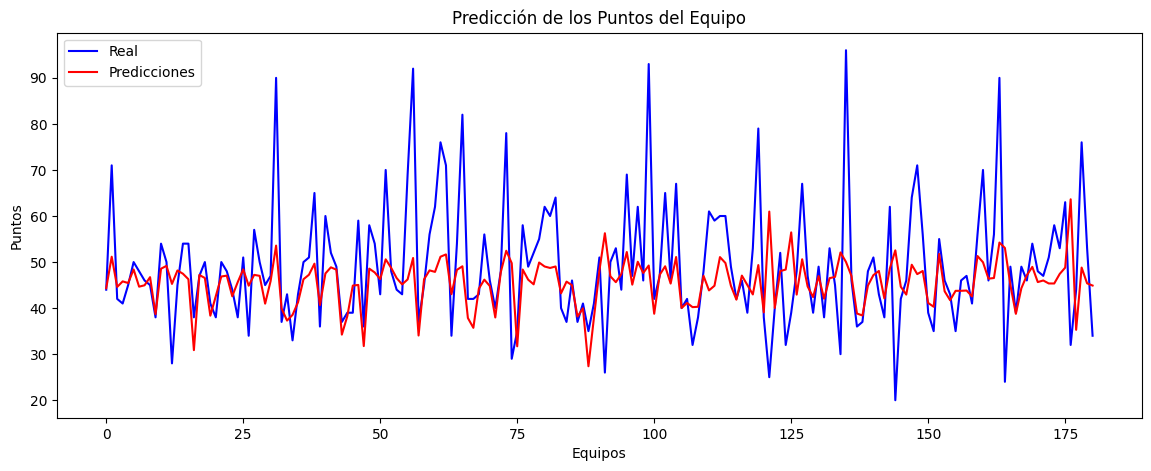

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv('LaLiga_dataset.csv')

# Seleccionar las características y la etiqueta
features = df[['home_goals', 'away_goals', 'goal_difference']].values
labels = df['points'].values

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# Convertir etiquetas a una escala similar
labels = labels.reshape(-1, 1)
scaled_labels = scaler.fit_transform(labels)

# Dividir en secuencias para la RNN
def create_sequences(data, labels, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(labels[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 5
X, y = create_sequences(scaled_features, scaled_labels, seq_length)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construir el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Hacer predicciones
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Graficar los resultados
plt.figure(figsize=(14, 5))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Real')
plt.plot(predictions, color='red', label='Predicciones')
plt.title('Predicción de los Puntos del Equipo')
plt.xlabel('Equipos')
plt.ylabel('Puntos')
plt.legend()
plt.show()


Epoch 1/100


C:\Users\carlo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 2.5821 - val_loss: 1.7365
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5393 - val_loss: 1.0217
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8997 - val_loss: 0.5842
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5122 - val_loss: 0.3298
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2937 - val_loss: 0.1861
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1657 - val_loss: 0.1098
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0995 - val_loss: 0.0668
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0638 - val_loss: 0.0453
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0439 - val_loss: 0.0349
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0362 - val_loss: 0.0324
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0329 - val_loss: 0.0274
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0294 - val_l

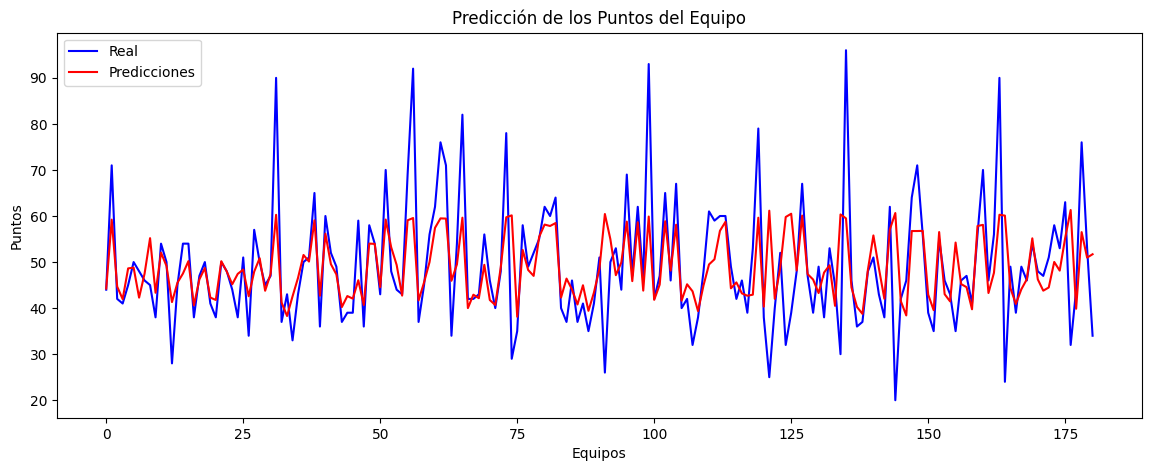

In [5]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Bidirectional

# Construir el modelo LSTM con regularización y dropout ajustado
model = Sequential()
model.add(Bidirectional(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=l2(0.01))))
model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(units=50, kernel_regularizer=l2(0.01))))
model.add(Dropout(0.4))
model.add(Dense(units=1))

# Compilar el modelo con una tasa de aprendizaje reducida
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Implementar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Hacer predicciones
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Graficar los resultados
plt.figure(figsize=(14, 5))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Real')
plt.plot(predictions, color='red', label='Predicciones')
plt.title('Predicción de los Puntos del Equipo')
plt.xlabel('Equipos')
plt.ylabel('Puntos')
plt.legend()
plt.show()
